In [6]:
from sklearn import tree
from sklearn.datasets import load_iris
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [7]:
test = pd.read_csv("test.csv", index_col=0)
y_pred = clf.predict(test.values)
proba = clf.predict_proba(test.values)[:, 1]
results = pd.DataFrame(proba, columns=["PredictedScore"])
results.index = test.index.values
results.index.names = ["TestId"]
results.to_csv("submission.csv") 

NameError: name 'pd' is not defined

In [174]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

test = pd.read_csv("/home/philip/Documents/CSM6420/Kaggle Compettion/test.csv")
train = pd.read_csv("/home/philip/Documents/CSM6420/Kaggle Compettion/train.csv")


(1039, 1025)
(1000, 1025)
0.762
0
1


<AxesSubplot:>

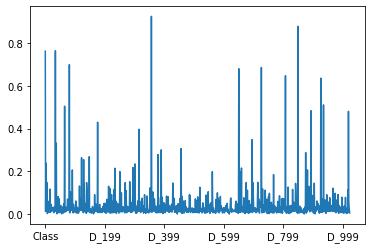

In [175]:
print(test.shape)
print(train.shape)
print(train.Class.mean())
print(train.Class.min())
print(train.Class.max())
train.mean(axis=0).plot()


In [194]:
y = train['Class']
print(y)
values = y.value_counts().keys().tolist()
counts = y.value_counts().tolist()
print(values)
print(counts)
# X =  train.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, stratify=y)

values = y_train.value_counts().keys().tolist()
counts = y_train.value_counts().tolist()
print(values)
print(counts)
values = y_test.value_counts().keys().tolist()
counts = y_test.value_counts().tolist()
print(values)
print(counts)

# print(values)
# print(counts)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(y.values)


0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: Class, Length: 1000, dtype: int64
[1, 0]
[762, 238]
[1, 0]
[305, 95]
[1, 0]
[457, 143]


In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

# Check the confusion matrix
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)

# Just get a classification report.
print(classification_report(y_test, y_test_pred))
, stratify=y)

print(y_test_pred)


              precision    recall  f1-score   support

           0       0.84      0.48      0.61       143
           1       0.86      0.97      0.91       457

    accuracy                           0.85       600
   macro avg       0.85      0.72      0.76       600
weighted avg       0.85      0.85      0.84       600



AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [196]:
test = pd.read_csv("test.csv", index_col=0)
y_pred = clf.predict(test.values)
proba = clf.predict_proba(test.values)[:, 1]
results = pd.DataFrame(proba, columns=["PredictedScore"])
results.index = test.index.values
results.index.names = ["TestId"]
results.to_csv("submission.csv") 


In [146]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_auc_and_roc(y_true, scores, col='red'):
    fpr, tpr, _ = roc_curve(y_true, scores)
    calc_auc = auc(fpr, tpr)
        
    plt.title("Recieving Operating Characteristic")
    plt.plot(fpr, tpr, col, label="AUC %0.3f" % calc_auc)
    plt.plot([0, 1], [0, 1], "b--")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

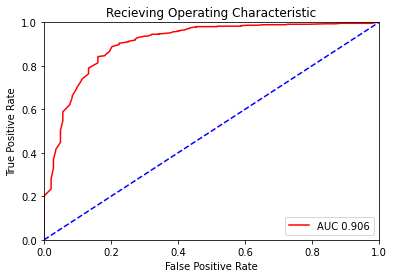

In [145]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
# only return the probability prediction for class 1
y_test_prob = clf.predict_proba(X_test)[:,1]
plot_auc_and_roc(y_test, y_test_prob)

In [149]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import SVG

def visualise_tree(treeclf):
    dot = export_graphviz(treeclf, filled=True, rounded=True)
    graph = graphviz.Source(dot)
    display(SVG(graph.pipe(format="svg")))

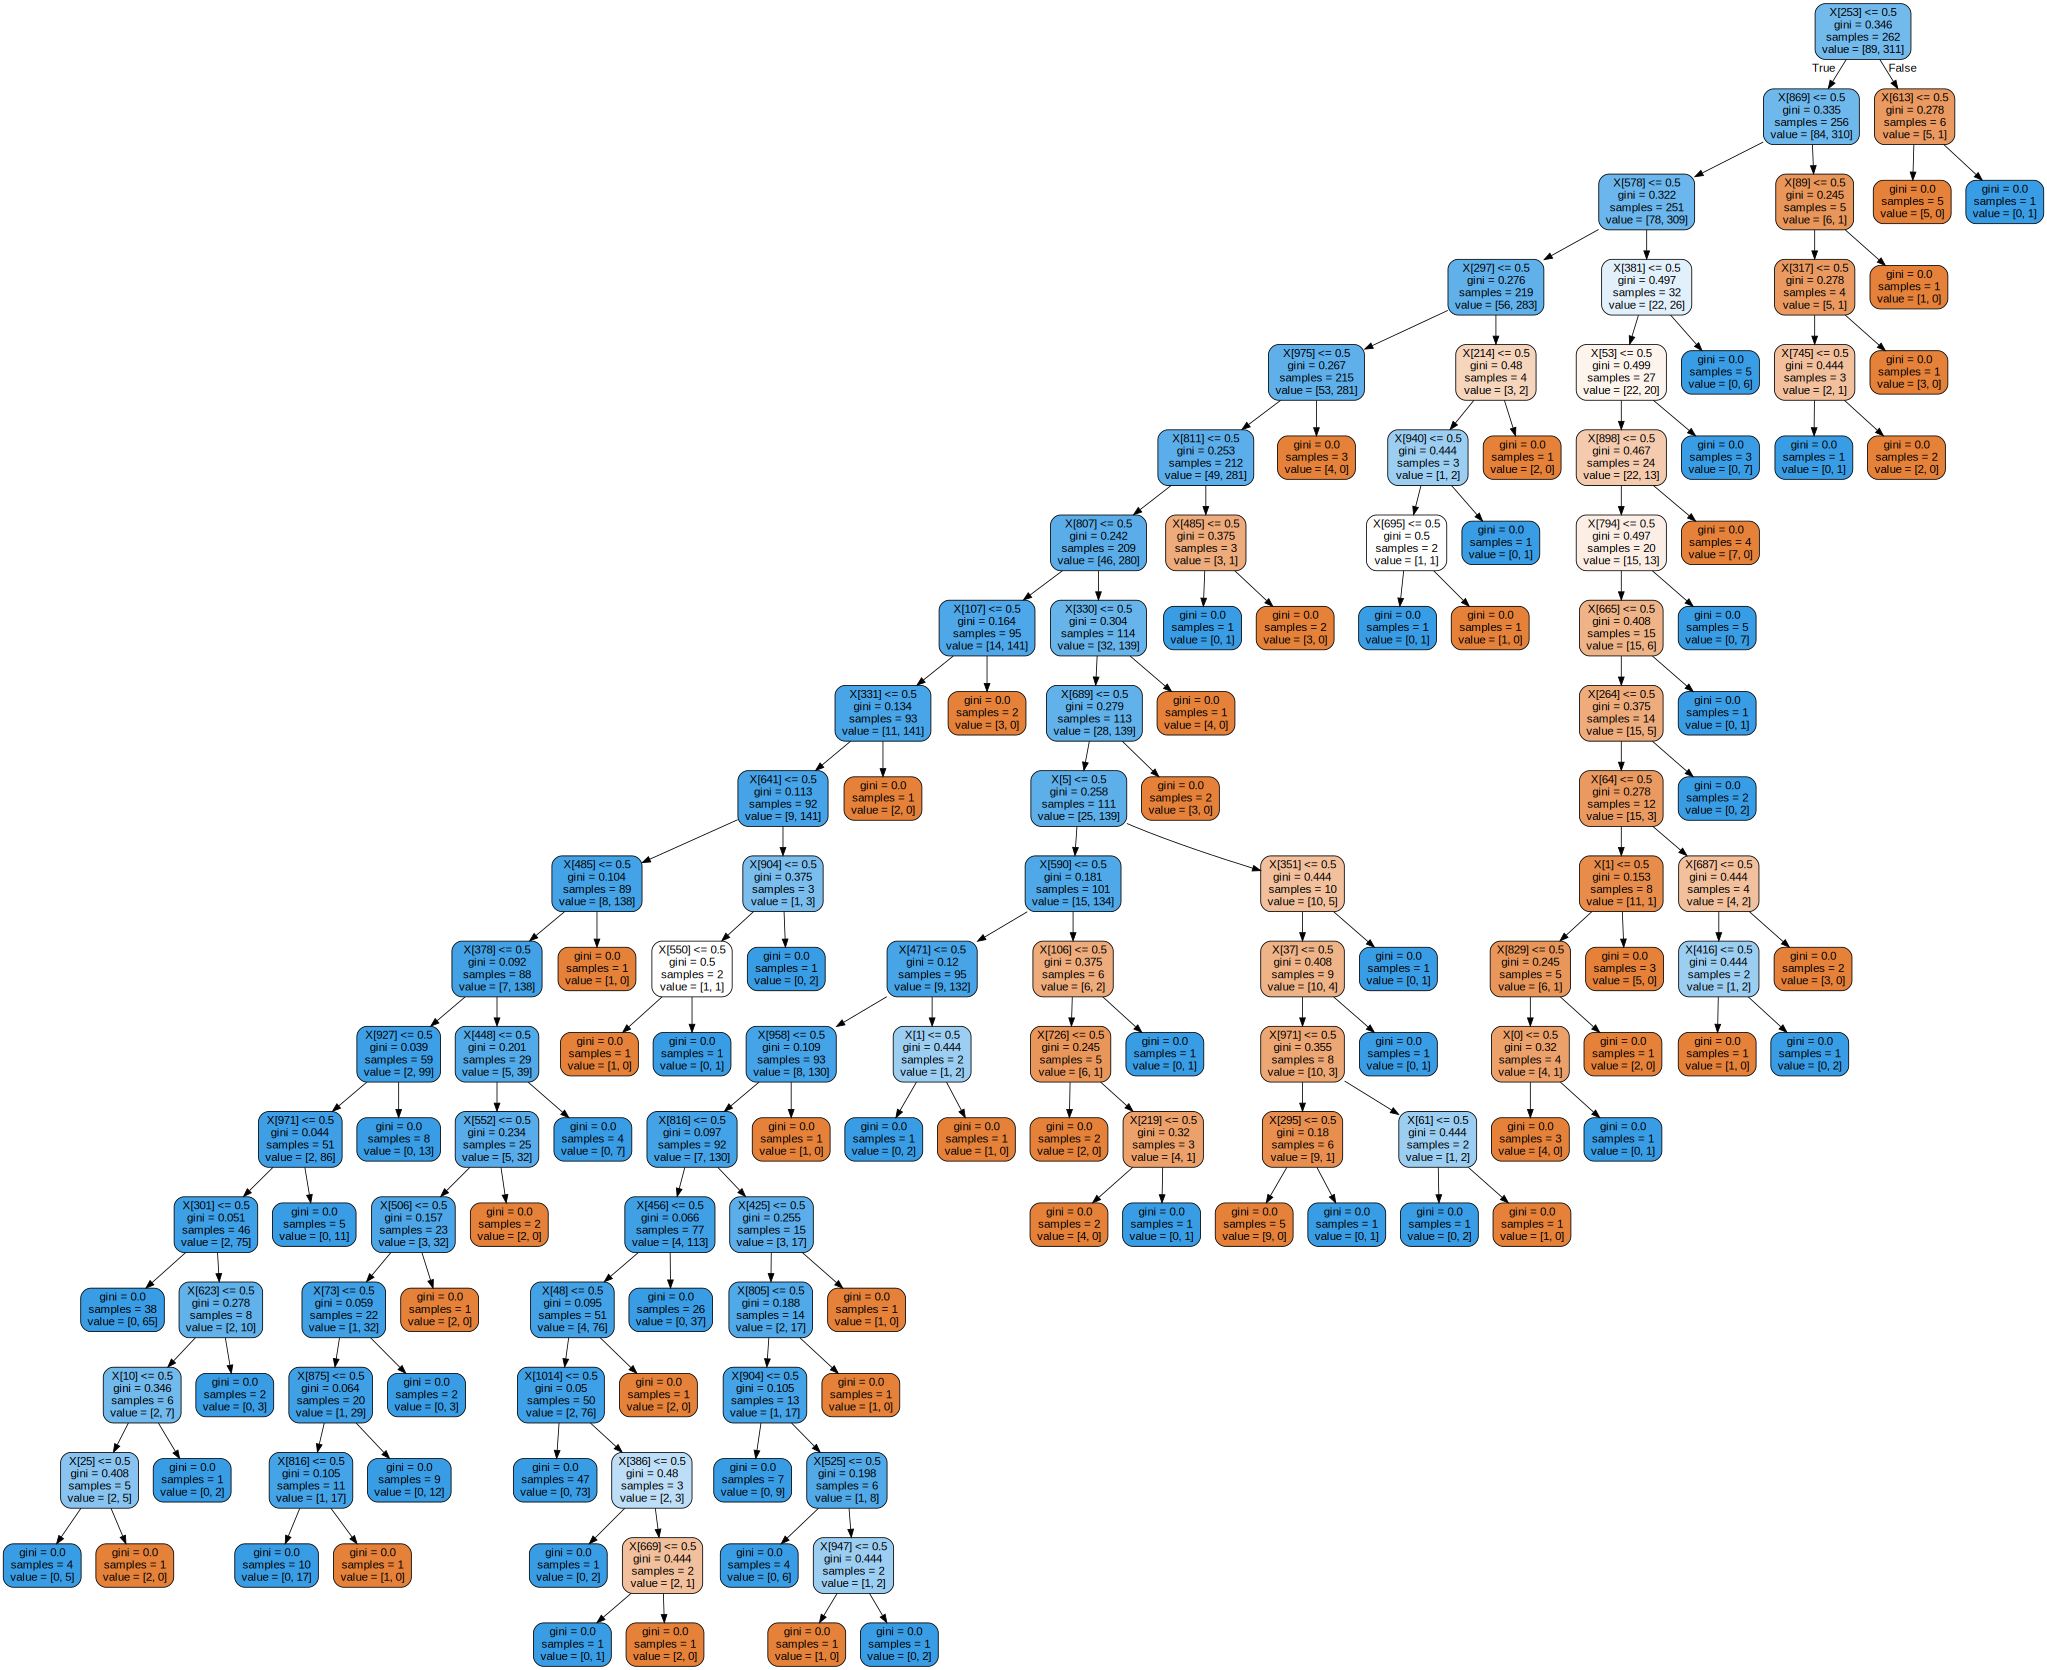

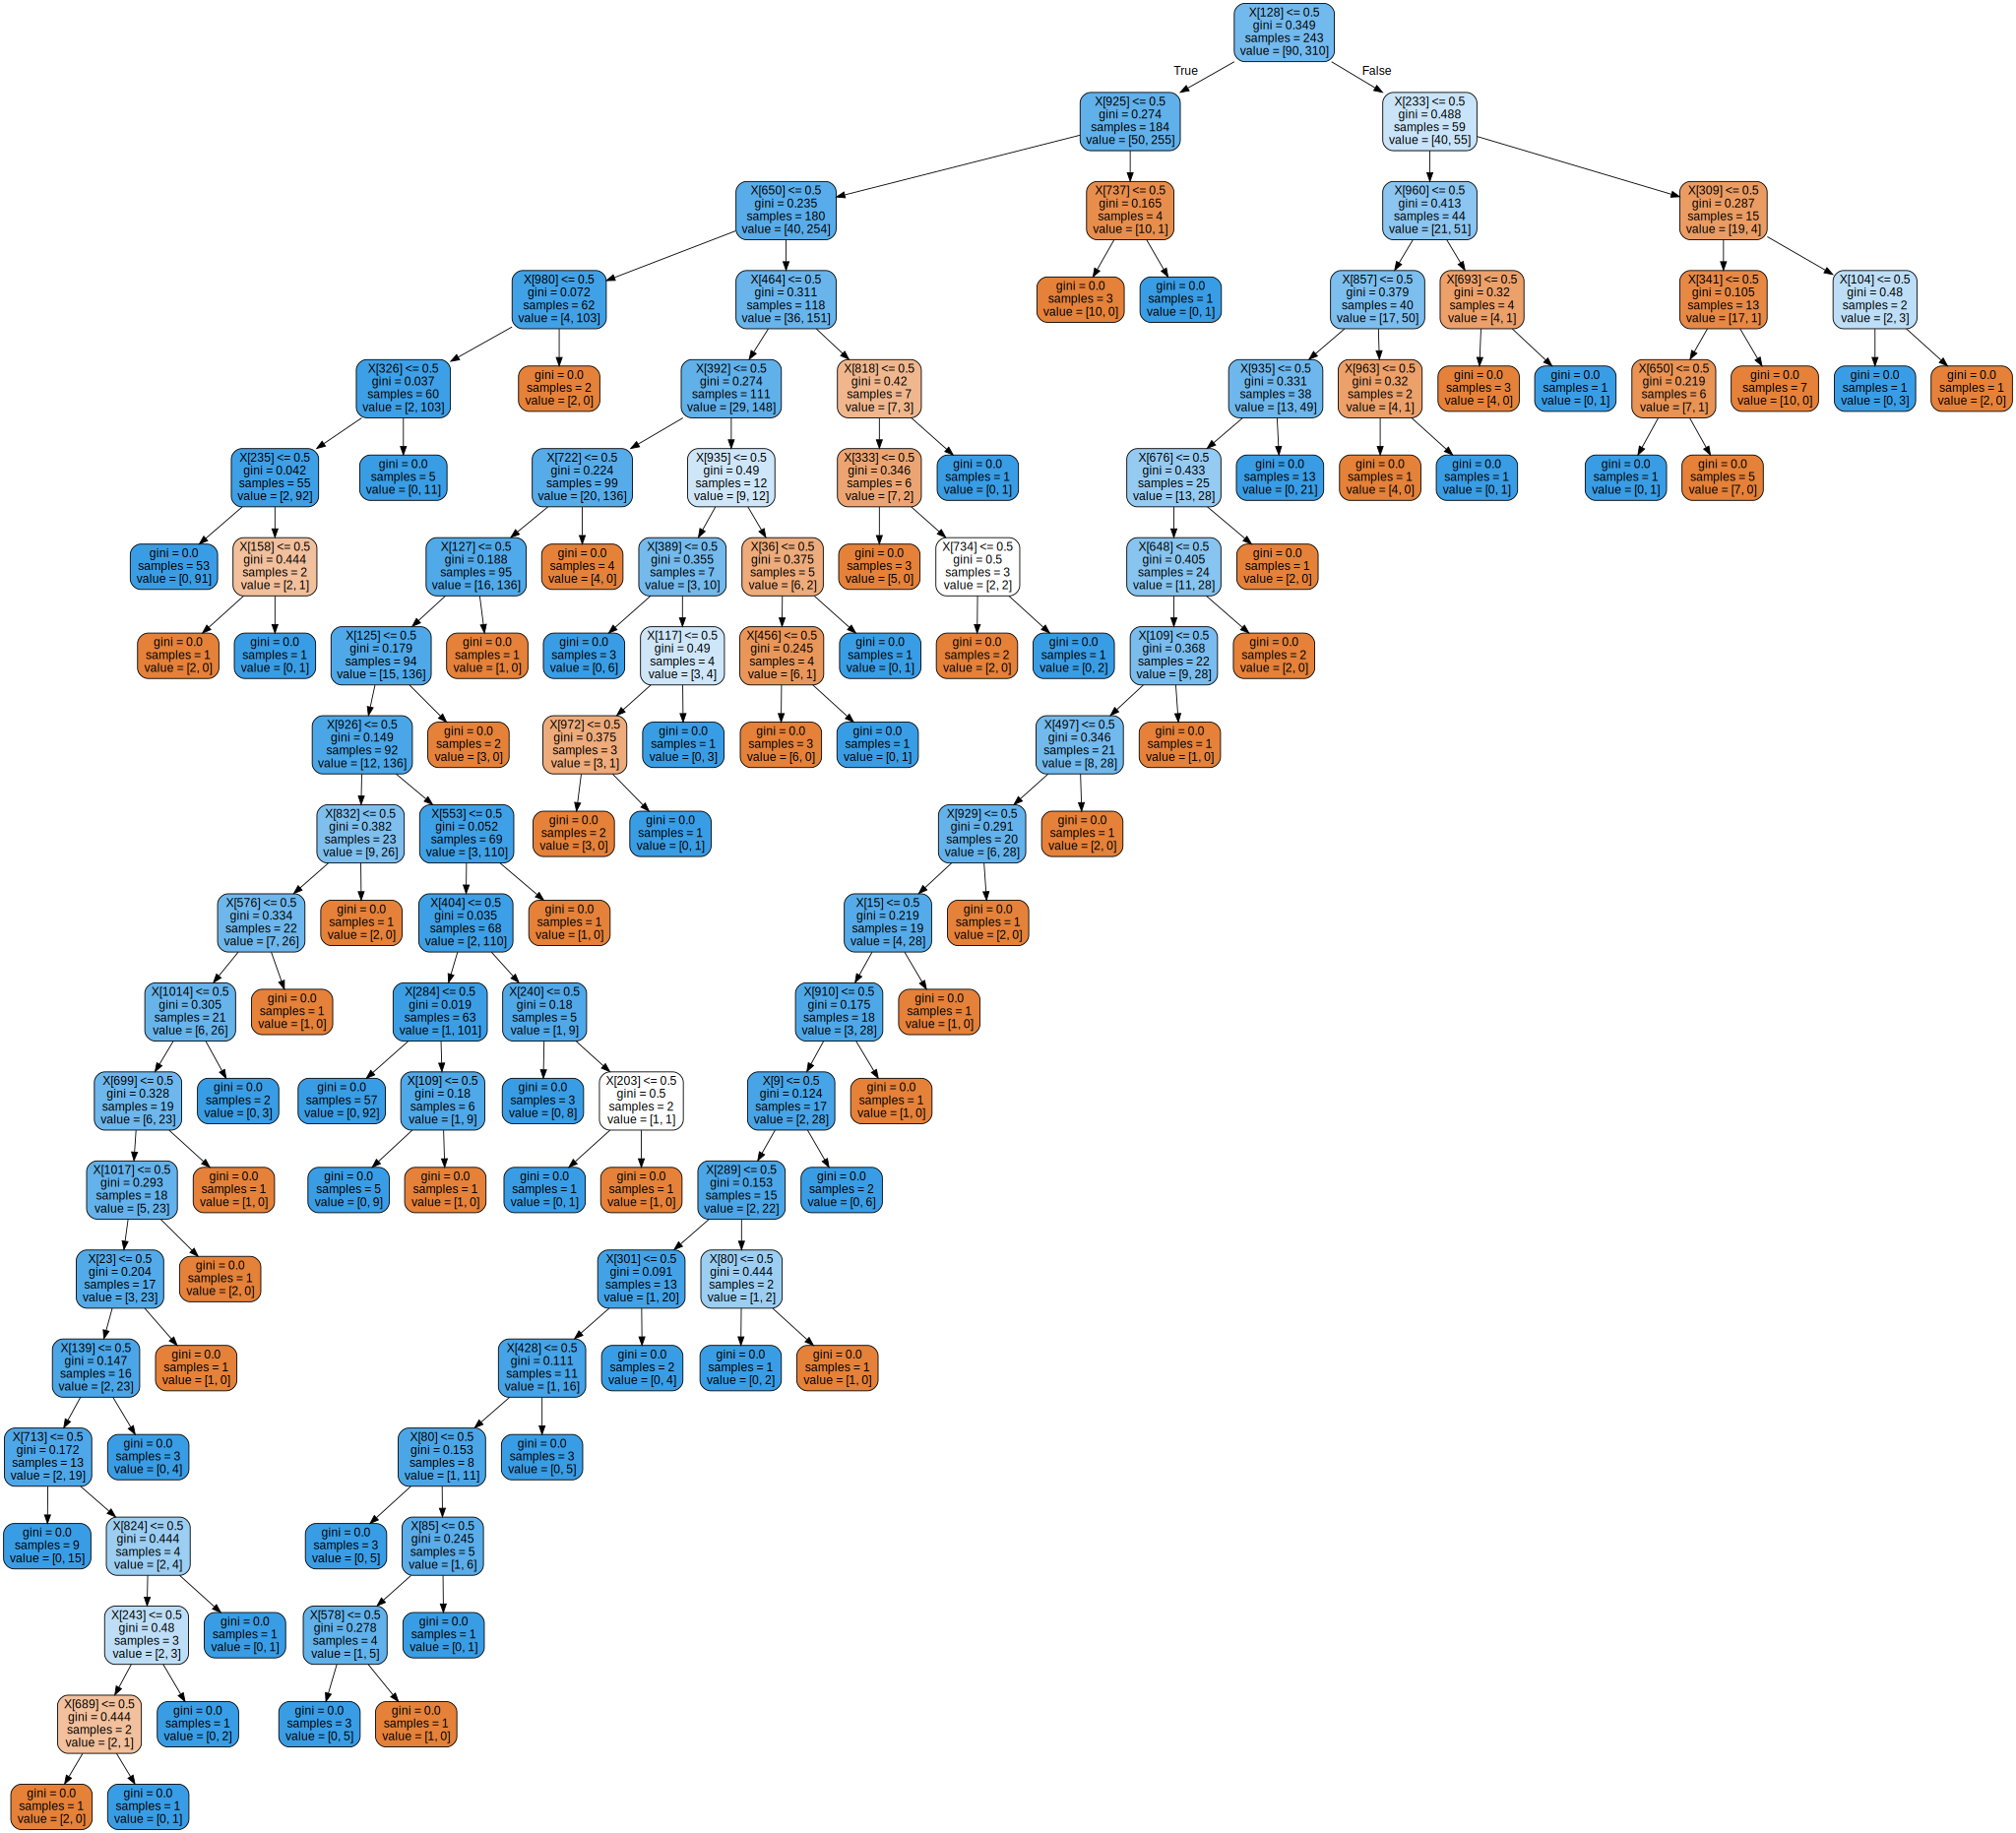

In [150]:
# Your code here 
#
visualise_tree(clf.estimators_[0])

visualise_tree(clf.estimators_[50])